In [5]:
class Character:
    def hi(self): #매개변수로 호출한 객체를 사용한다는 의미로 self 사용
        print('안녕하세요')
        
swordsman = Character()
print(type(swordsman))
fairy = Character()
thief = Character()
swordsman.hi() #self에는 swordsman객체가 전달
fairy.hi() #self에는 fairy객체가 전달

<class '__main__.Character'>
안녕하세요
안녕하세요


In [9]:
class Character:
    def hi(self, name): #self가 아닌 변수는 매개변수로 실행에서 인자값을 받음
        print('안녕! 난 {}'.format(name))
    def attack(self, target):
        print('{} 을/를 공격합니다.'.format(target))
swordsman = Character()
swordsman.hi('검술사')
fairy = Character()
fairy.hi('요정')
thief = Character()
thief.hi('도적')

swordsman.hi('검술사')
swordsman.attack('요정')
swordsman.attack('도적')

안녕! 난 검술사
안녕! 난 요정
안녕! 난 도적
안녕! 난 검술사
요정 을/를 공격합니다.
도적 을/를 공격합니다.


In [17]:
class Character:
    def __init__(self, name, hp, ad):
        self.name = name
        self.strength = hp
        self.attack_damage = ad
        print('Character 클래스의 객체 생성 => {}'.format(self.name))
    def attack(self, target):
        print('{} 을/를 공격합니다.'.format(target))
    def information(self):
        print('이름=> {}, 체력=> {}, 공격력=> {}'.format(self.name, self.strength, self.attack_damage))
    def level_up(self):
        self.strength *= 1.2
        self.attack_damage += 5
        
swordsman = Character('검술사', 100, 10)
print('{} {} {}'.format(swordsman.name, swordsman.strength, swordsman.attack_damage))
swordsman.information()
fairy = Character('요정', 60, 5)
fairy.information()
thief = Character('도적', 85, 8)
thief.information()

print('-----변경 전-----')
swordsman.information()
swordsman.strength = 120 #인스턴스 속성 변경
swordsman.attack_damage = 15
print('-----변경 후-----')
swordsman.information()

print('-----변경 전-----')
swordsman.information()
swordsman.level_up()
print('-----변경 후-----')
swordsman.information()

Character 클래스의 객체 생성 => 검술사
검술사 100 10
이름=> 검술사, 체력=> 100, 공격력=> 10
Character 클래스의 객체 생성 => 요정
이름=> 요정, 체력=> 60, 공격력=> 5
Character 클래스의 객체 생성 => 도적
이름=> 도적, 체력=> 85, 공격력=> 8
-----변경 전-----
이름=> 검술사, 체력=> 100, 공격력=> 10
-----변경 후-----
이름=> 검술사, 체력=> 120, 공격력=> 15
-----변경 전-----
이름=> 검술사, 체력=> 120, 공격력=> 15
-----변경 후-----
이름=> 검술사, 체력=> 144.0, 공격력=> 20


In [21]:
class Character:
    total_character_cnt = 0 #전체 객체 생성 개수 변수(클래스 속성)
    def __init__(self, name, hp, ad):
        self.name = name
        self.strength = hp
        self.attack_damage = ad
        print('Character 클래스의 객체 생성 => {}'.format(self.name))
        Character.total_character_cnt += 1
        print('현재 캐릭터 개수 = {}'.format(Character.total_character_cnt))
    def attack(self, target):
        print('{} 이/가 {} ({}) 을/를 공격합니다.'.format(self.name, target.name, target.strength))
        target.strength -= self.attack_damage
        print('공격 성공! {}({})'.format(target.name, target.strength))
    def information(self):
        print('이름=> {}, 체력=> {}, 공격력=> {}'.format(self.name, self.strength, self.attack_damage))
    def level_up(self):
        self.strength *= 1.2
        self.attack_damage += 5
swordsman = Character('검술사', 100, 10)
fairy = Character('요정', 60, 5)
thief = Character('도적', 85, 8)

swordsman.attack(fairy)
thief.attack(swordsman)
fairy.attack(thief)

Character 클래스의 객체 생성 => 검술사
현재 캐릭터 개수 = 1
Character 클래스의 객체 생성 => 요정
현재 캐릭터 개수 = 2
Character 클래스의 객체 생성 => 도적
현재 캐릭터 개수 = 3
검술사 이/가 요정 (60) 을/를 공격합니다.
공격 성공! 요정(50)
도적 이/가 검술사 (100) 을/를 공격합니다.
공격 성공! 검술사(92)
요정 이/가 도적 (85) 을/를 공격합니다.
공격 성공! 도적(80)


In [30]:
class Product:
    def __init__(self, n, p, s):
        self.name, self.price, self.stock = n, p, s
        
    def information(self):
        print('상품이름 : {}'.format(self.name))
        print('상품가격 : {}'.format(self.price))
        print('재고수량 : {}'.format(self.stock))
        
class Member:
    def __init__(self, n, d):
        self.name, self.join_date = n, d
        self.purchase_list = []
        self.purchase_amount = 0
    
    def information(self):
        print('회원이름 : {}'.format(self.name))
        print('가입날짜 : {}'.format(self.join_date))
        print('구매내역 : {}'.format(self.purchase_list))
        print('누적 구매금액 : {}'.format(self.purchase_amount))
        
    def buy(self, product, count):
        print('{} 고객님이 {} {} 개 구매!'.format(self.name, product.name, count))
        product.stock -= count #구매 수량만큼 재고 감소
        self.purchase_list.append(product.name) #구매내역에 상품 추가
        self.purchase_amount += (product.price * count) #누적 구매금액 증가
        
#물건 등록
socks = Product('socks', 1000, 10)
books = Product('books', 17500, 15)

#회원 가입
Anna = Member('Anna', '20200420')
Grace = Member('Grace', '20200130')

Anna.buy(socks, 1)

Anna.information()

socks.information()

Grace.buy(books, 2)
books.information()

Grace.information()

pen = Product('pen', 1200, 25)
Anna.buy(pen, 5)

Anna.information()

Anna 고객님이 socks 1 개 구매!
회원이름 : Anna
가입날짜 : 20200420
구매내역 : ['socks']
누적 구매금액 : 1000
상품이름 : socks
상품가격 : 1000
재고수량 : 9
Grace 고객님이 books 2 개 구매!
상품이름 : books
상품가격 : 17500
재고수량 : 13
회원이름 : Grace
가입날짜 : 20200130
구매내역 : ['books']
누적 구매금액 : 35000
Anna 고객님이 pen 5 개 구매!
회원이름 : Anna
가입날짜 : 20200420
구매내역 : ['socks', 'pen']
누적 구매금액 : 7000


핫플레이스가 위치한 행정동을 입력하세요. --> 행당1동
행당1동 - 11200560 를 분석합니다.
핫플레이스가 위치한 행정동을 입력하세요. -->행당2동
행당2동 - 11200570 를 분석합니다.


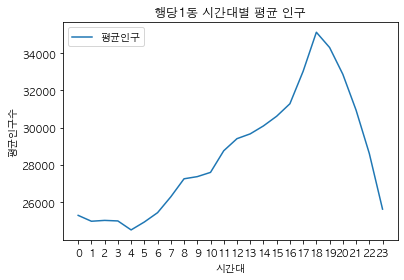

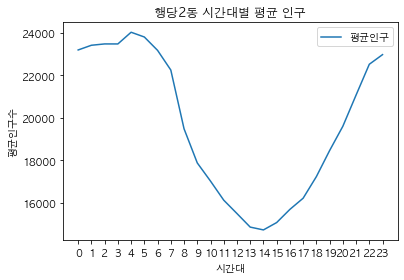

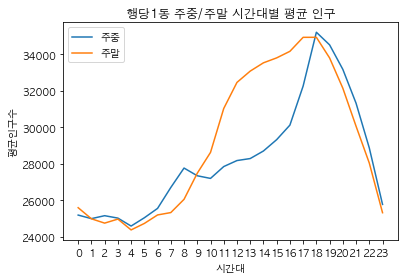

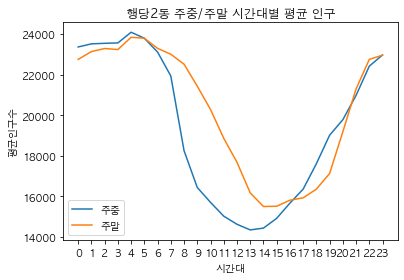

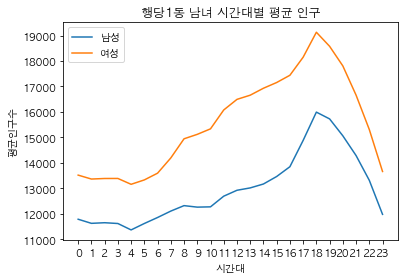

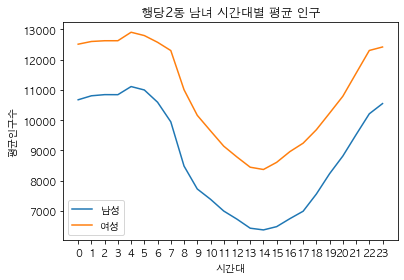

비교할 행정동을 입력하세요. --> 역삼1동
역삼1동 - 11680640 를 분석합니다.


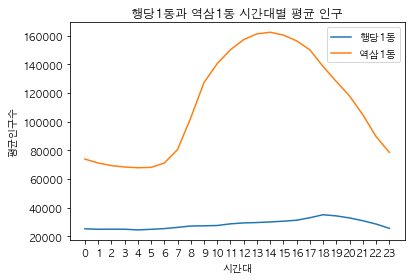

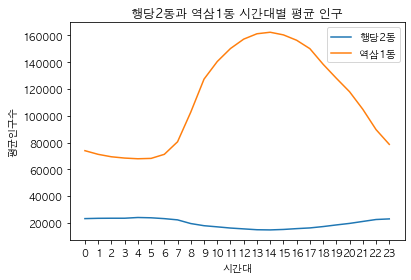

In [40]:
import matplotlib.pyplot as plt
import datetime
import csv

class Hotplace:
    def __init__(self, dong_name, dong_code):
        self.name = dong_name
        self.code = dong_code
        
    def graph_plot(self, popu_list, label_list, graph_title):
        plt.rc('font',family='AppleGothic')
        plt.title(graph_title)
        for i in range(len(popu_list)):
            plt.plot(range(24), popu_list[i], label = label_list[i])
        plt.legend()
        plt.xlabel('시간대')
        plt.ylabel('평균인구수')
        plt.xticks(range(24))
        plt.show()
        
    def analysis1(self, dong_name, dong_code, graph_yn = 'y'):
        population = [0 for i in range(24)]
        for row in data:
            if row[2] == dong_code:
                time, p = row[1], row[3]
                population[time] += p
        population = [p/31 for p in population]
        if graph_yn == 'n':
            return population
        population = [population]
        labels = ['평균인구']
        title = dong_name + ' 시간대별 평균 인구'
        self.graph_plot(population, labels, title)
        
    def analysis2(self):
        weekday = [0 for i in range(24)]
        weekend = [0 for i in range(24)]
        for row in data:
            if row[2] == self.code:
                time, p = row[1], row[3]
                year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
                num = datetime.date(year, mon, day).weekday()
                if num < 5:
                    weekday[time] += p
                else:
                    weekend[time] += p
        weekday_cnt, weekend_cnt = 0, 0
        for i in range(1, 32):
            if datetime.date(2019, 12, i).weekday() < 5:
                weekday_cnt += 1
            else:
                weekend_cnt += 1
        weekday = [w/weekday_cnt for w in weekday]
        weekend = [w/weekend_cnt for w in weekend]
        data_set = [weekday, weekend]
        labels = ['주중', '주말']
        title = self.name + ' 주중/주말 시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
            
    def analysis3(self):
        male = [0 for i in range(24)]
        female = [0 for i in range(24)]
        for row in data:
            if row[2] == self.code:
                time = row[1]
                male[time] += sum(row[4:18])
                female[time] += sum(row[18:32])
        male = [m/31 for m in male]
        female = [f/31 for f in female]
        data_set = [male, female]
        labels = ['남성', '여성']
        title = self.name + ' 남녀 시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
        
    def analysis4(self, dong_name2, dong_code2):
        population1 = self.analysis1(self.name, self.code, graph_yn = 'n')
        population2 = self.analysis1(dong_name2, dong_code2, graph_yn = 'n')
        data_set = [population1, population2]
        labels = [self.name, dong_name2]
        title = self.name + '과 ' + dong_name2 + ' 시간대별 평균 인구'
        self.graph_plot(data_set, labels, title)
        
def file_open():
    f = open('LOCAL_PEOPLE_DONG_201912.csv')
    data = csv.reader(f)
    next(data)
    data = list(data)
    
    f2 = open('dong_code.csv')
    code_data = csv.reader(f2)
    next(code_data)
    next(code_data)
    code_data = list(code_data)
    
    for row in data:
        for i in range(1,32):
            if i <= 2:
                row[i] = int(row[i])
            else:
                row[i] = float(row[i])
                
    for row in code_data:
        row[1] = int(row[1])
    return data, code_data

def dong_search(dong_name):
    for row in code_data:
        if row[-1] == dong_name:
            code = row[1]
    print('{} - {} 를 분석합니다.'.format(dong_name, code))
    return code

data, code_data = file_open()

input_name1 = input('핫플레이스가 위치한 행정동을 입력하세요. --> ')
input_code1 = dong_search(input_name1)
hangdong1 = Hotplace(input_name1, input_code1)

input_name2 = input('핫플레이스가 위치한 행정동을 입력하세요. -->')
input_code2 = dong_search(input_name2)
hangdong2 = Hotplace(input_name2, input_code2)

hangdong1.analysis1(input_name1, input_code1)
hangdong2.analysis1(input_name2, input_code2)

hangdong1.analysis2()
hangdong2.analysis2()

hangdong1.analysis3()
hangdong2.analysis3()

input_name3 = input('비교할 행정동을 입력하세요. --> ')
input_code3 = dong_search(input_name3)

hangdong1.analysis4(input_name3, input_code3)
hangdong2.analysis4(input_name3, input_code3)

# 14장 실습

### 1번

In [42]:
class Customer_account:
    def __init__(self, name, bal):
        self.name = name
        self.balance = bal
        print('{} 고객님! 계좌를 개설했습니다. 잔고는 {} 원'.format(self.name, self.balance))
        
class Bank:
    def deposit(self, customer, amount):
        customer.balance += amount
        print('{} 고객님 {} 원 입금'.format(customer.name, amount))
        print('입금 후 잔고는 {} 원'.format(customer.balance))
        
    def withdrawal(self, customer, amount):
        customer.balance -= amount
        print('{} 고객님 {} 원 출금'.format(customer.name, amount))
        print('출금 후 잔고는 {} 원'.format(customer.balance))
        
    def send_money(self, sender, reciever, amount):
        sender.balance -= amount
        reciever.balance += amount
        print('{} 고객님이 {} 고객님께 {} 원 송금'.format(sender.name, reciever.name, amount))
        print('이체 후 잔고는 {} {} {} {}'.format(sender.name, sender.balance, reciever.name, reciever.balance))

### 2번

In [47]:
class Customer_account:
    def __init__(self, name, bal):
        self.name = name
        self.balance = bal
        print('{} 고객님! 계좌를 개설했습니다. 잔고는 {} 원'.format(self.name, self.balance))
        
class Bank:
    def deposit(self, customer, amount):
        customer.balance += amount
        print('{} 고객님 {} 원 입금'.format(customer.name, amount))
        print('입금 후 잔고는 {} 원'.format(customer.balance))
        
    def withdrawal(self, customer, amount):
        customer.balance -= amount
        print('{} 고객님 {} 원 출금'.format(customer.name, amount))
        print('출금 후 잔고는 {} 원'.format(customer.balance))
        
    def send_money(self, sender, reciever, amount):
        sender.balance -= amount
        reciever.balance += amount
        print('{} 고객님이 {} 고객님께 {} 원 송금'.format(sender.name, reciever.name, amount))
        print('이체 후 잔고는 {} {} {} {}'.format(sender.name, sender.balance, reciever.name, reciever.balance))
        
ryan = Customer_account('ryan', 50000)
prodo = Customer_account('prodo', 100000)
bank_a = Bank()
bank_a.withdrawal(ryan, 15000)
bank_a.deposit(prodo, 20000)
bank_a.send_money(prodo, ryan, 25000)

ryan 고객님! 계좌를 개설했습니다. 잔고는 50000 원
prodo 고객님! 계좌를 개설했습니다. 잔고는 100000 원
ryan 고객님 15000 원 출금
출금 후 잔고는 35000 원
prodo 고객님 20000 원 입금
입금 후 잔고는 120000 원
prodo 고객님이 ryan 고객님께 25000 원 송금
이체 후 잔고는 prodo 95000 ryan 60000


### 3번

In [52]:
class Customer_account:
    def __init__(self, name, bal):
        self.name = name
        self.balance = bal
        print('{} 고객님! 계좌를 개설했습니다. 잔고는 {} 원'.format(self.name, self.balance))
        self.commission = 0
        
class Bank:
    def __init__(self):
        self.commission = 0
        
    def deposit(self, customer, amount):
        self.commission += 500
        customer.balance += (amount-500)
        print('{} 고객님 {} 원 입금'.format(customer.name, amount-500))
        print('입금 후 잔고는 {} 원'.format(customer.balance))
        
    def withdrawal(self, customer, amount):
        self.commission += 500
        customer.balance -= (amount+500)
        print('{} 고객님 {} 원 출금'.format(customer.name, amount+500))
        print('출금 후 잔고는 {} 원'.format(customer.balance))
        
    def send_money(self, sender, reciever, amount):
        self.commission += 800
        sender.balance -= (amount-800)
        reciever.balance += (amount-800)
        print('{} 고객님이 {} 고객님께 {} 원 송금'.format(sender.name, reciever.name, amount-800))
        print('이체 후 잔고는 {} {} {} {}'.format(sender.name, sender.balance, reciever.name, reciever.balance))

### 4번

In [56]:
class Customer_account:
    def __init__(self, name, bal):
        self.name = name
        self.balance = bal
        print('{} 고객님! 계좌를 개설했습니다. 잔고는 {} 원'.format(self.name, self.balance))
        self.commission = 0
        
class Bank:
    def __init__(self):
        self.commission = 0
        
    def deposit(self, customer, amount):
        self.commission += 500
        customer.balance += (amount-500)
        print('{} 고객님 {} 원 입금'.format(customer.name, amount-500))
        print('입금 후 잔고는 {} 원'.format(customer.balance))
        
    def withdrawal(self, customer, amount):
        self.commission += 500
        customer.balance -= (amount-500)
        print('{} 고객님 {} 원 출금'.format(customer.name, amount+500))
        print('출금 후 잔고는 {} 원'.format(customer.balance))
        
    def send_money(self, sender, reciever, amount):
        self.commission += 800
        sender.balance -= (amount-800)
        reciever.balance += (amount-800)
        print('{} 고객님이 {} 고객님께 {} 원 송금'.format(sender.name, reciever.name, amount-800))
        print('이체 후 잔고는 {} {} {} {}'.format(sender.name, sender.balance, reciever.name, reciever.balance))
        
ryan = Customer_account('ryan', 50000)
prodo = Customer_account('prodo', 100000)
bank_a = Bank()
bank_a.deposit(ryan, 10000)
bank_a.send_money(prodo, ryan, 25000)
bank_a.withdrawal(ryan, 30000)
print('수수료 수입 : {}'.format(bank_a.commission))

ryan 고객님! 계좌를 개설했습니다. 잔고는 50000 원
prodo 고객님! 계좌를 개설했습니다. 잔고는 100000 원
ryan 고객님 9500 원 입금
입금 후 잔고는 59500 원
prodo 고객님이 ryan 고객님께 24200 원 송금
이체 후 잔고는 prodo 75800 ryan 83700
ryan 고객님 30500 원 출금
출금 후 잔고는 54200 원
수수료 수입 : 1800
